In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans  
import cv2

In [66]:
path="/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab1/images/im1.jpg"
image=cv2.imread(path)

In [67]:
print(image)
print('----------------------')
print(image.shape)

[[[106  98  75]
  [103  95  72]
  [100  92  69]
  ...
  [ 87 112 132]
  [ 86 111 131]
  [ 85 110 130]]

 [[114 105  85]
  [ 95  86  66]
  [ 84  76  53]
  ...
  [ 95 120 140]
  [ 93 118 138]
  [ 90 115 135]]

 [[114 105  85]
  [107  98  78]
  [102  93  73]
  ...
  [ 97 122 142]
  [ 96 121 141]
  [ 93 118 138]]

 ...

 [[ 78 102 120]
  [ 77 101 121]
  [ 77 101 121]
  ...
  [ 52  79 106]
  [ 52  79 106]
  [ 52  79 106]]

 [[ 79 101 119]
  [ 78  99 120]
  [ 78  99 120]
  ...
  [ 54  81 108]
  [ 55  81 111]
  [ 55  81 111]]

 [[ 79 101 119]
  [ 78  99 120]
  [ 78  99 120]
  ...
  [ 53  80 107]
  [ 55  81 111]
  [ 55  81 111]]]
----------------------
(1964, 3024, 3)


In [68]:
# resizing the image 
image=cv2.resize(image,(600,400))

In [69]:
image.shape

(400, 600, 3)

In [70]:
lab_image=cv2.cvtColor (image,cv2.COLOR_BGR2Lab)

In [72]:
pixels = lab_image.reshape((-1,3))

In [73]:
pixels.shape

(240000, 3)

In [74]:
pixels.sum()

92113867

In [75]:
kmeans=KMeans(n_clusters=8,)

In [76]:
kmeans.fit(pixels)

KMeans()

In [77]:
dominant_color=kmeans.cluster_centers_[kmeans.predict([[0,0,0]])]


In [78]:
dominant_color.dtype

dtype('float64')

In [79]:
dominant_color=dominant_color.astype(int)

In [81]:
dom_col_image=np.zeros((100,600,3))
print(dom_col_image.shape, dom_col_image.dtype
)

(100, 600, 3) float64


In [ ]:
import cv2
import numpy as np

# Function to adjust contrast
def adjust_contrast(image, alpha):
    return np.clip(alpha * image, 0, 255).astype(np.uint8)

# Callback function for trackbar (does nothing, just required for trackbar to work)
def nothing(x):
    pass

# Load the image
image = cv2.imread('/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab1/images/im1.jpg')

# Check if image loaded properly
if image is None:
    print("Error: Unable to load image.")
    exit()

# Reshape image to a 2D array of pixels
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 and display colors
centers = np.uint8(centers)

# Create an image to show cluster colors
color_image = np.zeros((100, 600, 3), dtype=np.uint8)
for i in range(k):
    color_image[:, i * 120:(i + 1) * 120] = centers[i]

# Create a window
cv2.namedWindow('Contrast Adjustment')

# Create trackbar to control contrast (alpha value from 1 to 3 with step of 0.01)
cv2.createTrackbar('Contrast', 'Contrast Adjustment', 100, 300, nothing)

# Loop until the user presses 'q' to exit
while True:
    # Get the current trackbar position (scale down to 1.0-3.0)
    alpha = cv2.getTrackbarPos('Contrast', 'Contrast Adjustment') / 100.0
    
    # Adjust the contrast of the original image
    adjusted_image = adjust_contrast(image, alpha)
    
    # Display the adjusted image and color clusters
    cv2.imshow('Contrast Adjustment', adjusted_image)
    cv2.imshow('Color Clusters', color_image)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup and close windows
cv2.destroyAllWindows()

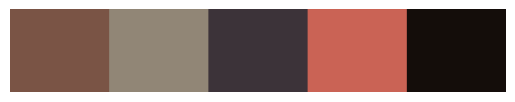

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

img = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab1/images/im1.jpg'
clusters = 5
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()

# Create an image to show dominant colors
dominant_color_image = np.zeros((100, 600, 3), dtype=np.uint8)
for i in range(clusters):
    dominant_color_image[:, i * 120:(i + 1) * 120] = colors[i]



Dominant Colors (RGB): [[ 30  33  55]
 [202 203 205]
 [107  94  86]
 [146 130 111]
 [166 163 163]]


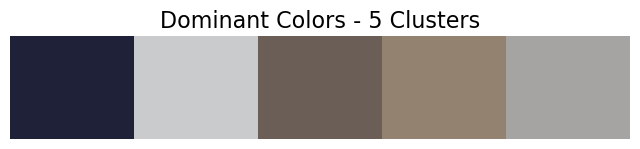

Dominant Colors (RGB): [[209 179 157]
 [ 71  62  64]
 [127 122 111]
 [185  93  81]
 [ 22  15  12]]


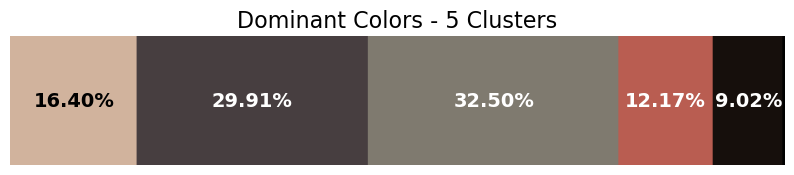

: 

In [6]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

class DominantColors:
    def __init__(self, image_path, clusters=3):
        """
        Initialize with the image path and the number of clusters.
        
        Parameters:
            image_path (str): Path to the input image.
            clusters (int): Number of dominant colors to find.
        """
        self.image_path = image_path
        self.clusters = clusters
        self.colors = None
        self.dominance = None

    def dominant_colors(self):
        """
        Identify the dominant colors in the image using KMeans clustering.

        Returns:
            np.ndarray: Array of dominant colors in RGB format.
            List of tuples with (color, dominance level).
        """
        # Read the image
        img = cv2.imread(self.image_path)
        if img is None:
            raise ValueError("Image not found. Please check the file path.")

        # Convert from BGR to LAB
        img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

        # Convert LAB to RGB for visualization
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Reshape the image to be a list of pixels
        img_reshaped = img_rgb.reshape((-1, 3))

        # Use KMeans to cluster pixels
        kmeans = KMeans(n_clusters=self.clusters, random_state=42)
        kmeans.fit(img_reshaped)

        # The cluster centers are our dominant colors
        self.colors = kmeans.cluster_centers_.astype(int)
        
        # Calculate the dominance level of each color
        self.dominance = np.bincount(kmeans.labels_)
        
        return self.colors

    def plot_dominant_colors(self):
        """
        Plot the dominant colors as a horizontal bar with dominance levels.
        """
        if self.colors is None or self.dominance is None:
            raise ValueError("You need to call dominant_colors() first.")

        # Normalize dominance for display
        dominance_normalized = (self.dominance / self.dominance.sum()) * 100
        
        # Create an image to show dominant colors with dominance levels
        total_width = 600
        dominant_color_image = np.zeros((100, total_width, 3), dtype=np.uint8)

        # Calculate starting position
        start_x = 0
        
        for i in range(self.clusters):
            # Calculate width based on dominance
            width = int((dominance_normalized[i] / 100) * total_width)
            dominant_color_image[:, start_x:start_x + width] = self.colors[i]
            start_x += width

        # Plot the dominant colors
        plt.figure(figsize=(10, 5))
        plt.imshow(dominant_color_image)
        plt.axis('off')  # Hide axes
        
        # Add text annotations for dominance levels
        start_x = 0
        for i in range(self.clusters):
            width = int((dominance_normalized[i] / 100) * total_width)
            plt.text(start_x + width // 2, 50,
                     f"{dominance_normalized[i]:.2f}%",
                     horizontalalignment='center', verticalalignment='center',
                     color='white' if np.mean(self.colors[i]) < 128 else 'black',
                     fontsize=14, weight='bold')
            start_x += width

        plt.title(f'Dominant Colors - {self.clusters} Clusters', fontsize=16)
        plt.show()

# Usage example
if __name__ == "__main__":
    img_path = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab1/images/im1.jpg'
    clusters = 5
    dc = DominantColors(img_path, clusters)
    colors = dc.dominant_colors()
    print("Dominant Colors (RGB):", colors)

    # Plot the dominant colors
    dc.plot_dominant_colors()